# THỰC HÀNH NHẬN DIỆN GIÁ TRỊ NGOẠI LAI

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

data= pd.read_csv('data/housing-prices-dataset/train.csv')

Một số phương pháp nhận diện giá trị ngoại lai đơn giản:

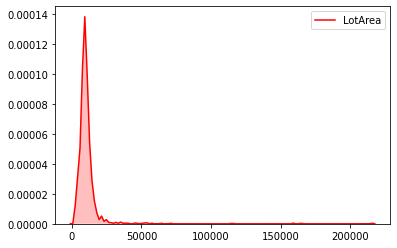

In [2]:
sns.kdeplot(data['LotArea'], shade=True, color="r")

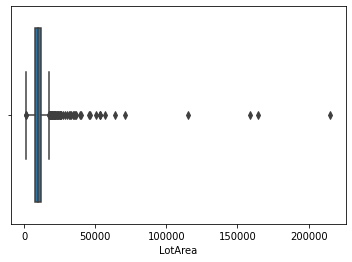

In [3]:
sns.boxplot(x= data['LotArea'])

## Dựa vào giả định phân phối chuẩn (Z-score)  
Xác định giá trị ngoại lai trong một biến đơn lẻ

In [4]:
from scipy import stats
z= stats.zscore(data['LotArea'])
threshold= 3
LotArea_outliers_v1= np.absolute(z) >= threshold

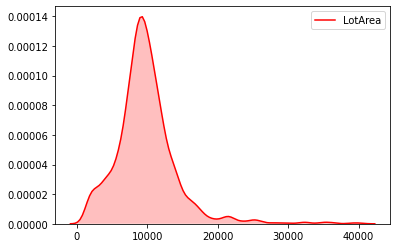

In [5]:
sns.kdeplot(data['LotArea'][LotArea_outliers_v1== False], shade=True, color="r")

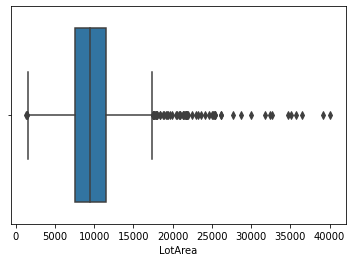

In [6]:
sns.boxplot(x= data['LotArea'][LotArea_outliers_v1== False])

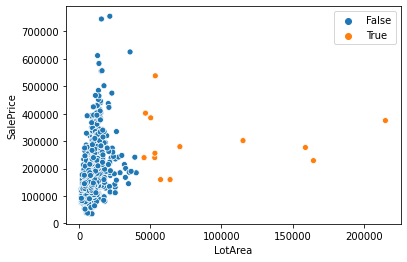

In [7]:
sns.scatterplot(x= data['LotArea'], y= data["SalePrice"], hue= LotArea_outliers_v1)

## Dựa vào giá trị cực (cao/thấp)  
Xác định giá trị ngoại lai trong một biến đơn lẻ

In [8]:
quantile_1= data['LotArea'].quantile(0.25)
quantile_3 = data['LotArea'].quantile(0.75)
iqr= quantile_3 - quantile_1
lower_boundary= quantile_1 - 1.5 * iqr
upper_boundary= quantile_3 + 1.5 * iqr
LotArea_outliers_v2= (data['LotArea'] <= lower_boundary) | ((data['LotArea'] > upper_boundary))

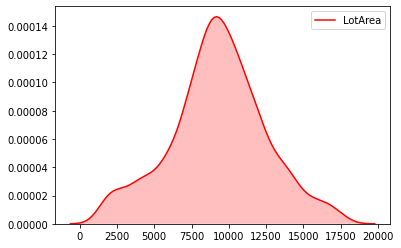

In [9]:
sns.kdeplot(data['LotArea'][LotArea_outliers_v2== False], shade=True, color="r")

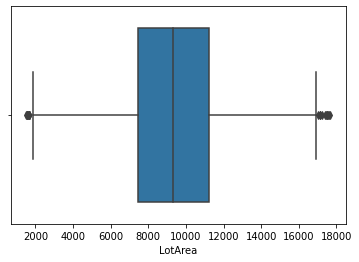

In [10]:
sns.boxplot(x= data['LotArea'][LotArea_outliers_v2== False])

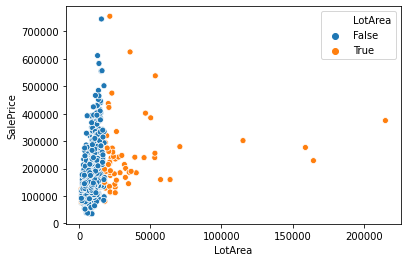

In [11]:
sns.scatterplot(x= data['LotArea'], y= data["SalePrice"], hue= LotArea_outliers_v2)

## Dựa vào trung vị của sai lệch tuyệt đối với trung vị  
Xác định giá trị ngoại lai trong một biến đơn lẻ

In [12]:
d= data['LotArea'] - data['LotArea'].median()
d= np.absolute(d)
t= d/ d.median()
LotArea_outliers_v3= t > 4.5

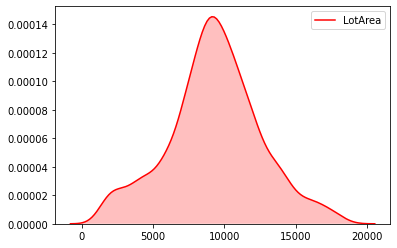

In [13]:
sns.kdeplot(data['LotArea'][LotArea_outliers_v3== False], shade=True, color="r")

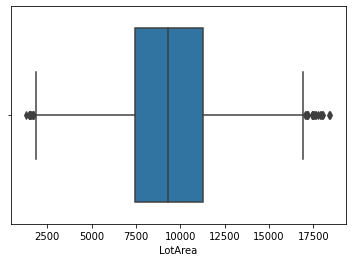

In [14]:
sns.boxplot(x= data['LotArea'][LotArea_outliers_v3== False])

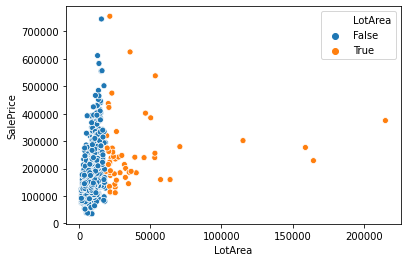

In [15]:
sns.scatterplot(x= data['LotArea'], y= data["SalePrice"], hue= LotArea_outliers_v3)

## Dựa vào Cook’s Distance  
Xác định giá trị ngoại lai trong mối quan hệ giữa các biến số

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_colle

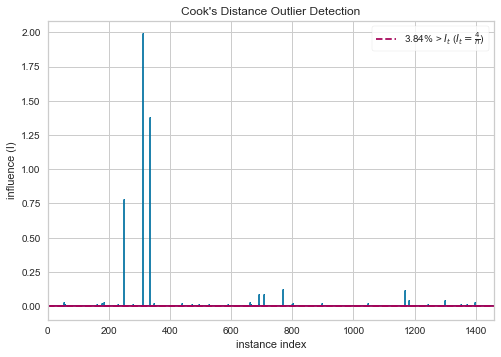

In [16]:
X = data["LotArea"].values.reshape(-1,1)
y = data["SalePrice"]

from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

In [17]:
threshold=  1 / data.shape[0] # Chọn ngưỡng
LotArea_outliers_v4= visualizer.distance_ > threshold

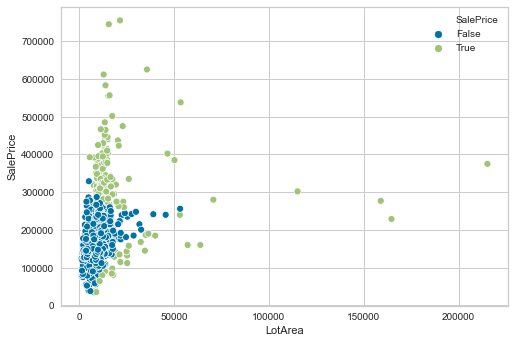

In [18]:
sns.scatterplot(x= data['LotArea'], y= data["SalePrice"], hue= LotArea_outliers_v4)

In [32]:
# score khi bao gồm outliers
from sklearn.linear_model import LinearRegression
X = data["LotArea"].values.reshape(-1,1)
y = data["SalePrice"]
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.0696133153821118

In [31]:
# score khi loại bỏ outliers
X_v1 = data.loc[LotArea_outliers_v4 == False ,'LotArea'].values.reshape(-1, 1)
y_v1 = data.loc[LotArea_outliers_v4 == False ,'SalePrice']
reg_v1 = LinearRegression().fit(X_v2, y_v2)
reg_v1.score(X_v1, y_v1)

0.10131626430104634

## Dựa vào trung bình của phần dư

In [19]:
from sklearn.linear_model import LinearRegression
X = data["LotArea"].values.reshape(-1,1)
y = data["SalePrice"]
reg = LinearRegression().fit(X, y)
y_predict= reg.predict(X)
residuals= y_predict - y

z_residuals= stats.zscore(residuals)
threshold= 2 # Chọn ngưỡng
LotArea_outliers_v5= np.absolute(z_residuals) >= threshold

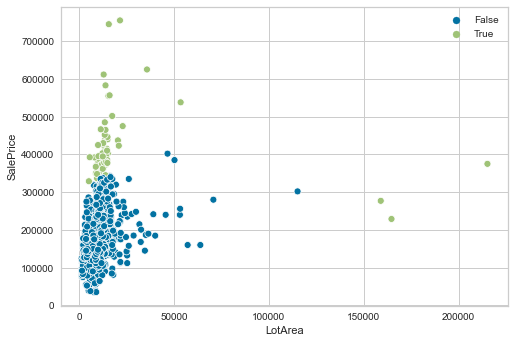

In [20]:
sns.scatterplot(x= data['LotArea'], y= data["SalePrice"], hue= LotArea_outliers_v5)

In [29]:
# score khi bao gồm outliers
reg.score(X, y)

0.0696133153821118

In [30]:
# score khi loại bỏ outliers
X_v2 = data.loc[LotArea_outliers_v5 == False ,'LotArea'].values.reshape(-1, 1)
y_v2 = data.loc[LotArea_outliers_v5 == False ,'SalePrice']
reg_v2 = LinearRegression().fit(X_v2, y_v2)
reg_v2.score(X_v2, y_v2)

0.10435170640435565